In [2]:
from collections import deque

import matplotlib.pyplot as plt
import matplotlib 
import matplotlib.cm as cm
import matplotlib.transforms as mtransforms

from decimal import *
import numpy as np

In [3]:
def calcualte_numbers_and_grids(A_val,B_val, layer_max_number, layer_distance = 4):
    A = Decimal(A_val)
    B = Decimal(B_val)
    Delta = A - B

    Numbers = []

    Major_Grid_x = []
    Major_Grid_y = []

    Minor_Grid_x = []
    Minor_Grid_y = []

    Sending_Grid_x = []
    Sending_Grid_y = []

    Recieivng_Grid_x = []
    Recieivng_Grid_y = []

    for layer_number in range(layer_max_number):


        nodes_in_layer = layer_number + 1
        wavefronts_in_layer = 2*nodes_in_layer

        current_number = layer_number*A

        layer_x = layer_number * layer_distance
        layer_max_y = layer_x

        Numbers.append(current_number)

        # Major Grid
        Major_Grid_x.append(layer_x)
        Major_Grid_y.append(layer_max_y)

        # Minor Grid
        Minor_Grid_x.append(layer_x + layer_distance/2)
        Minor_Grid_y.append(layer_max_y + layer_distance/2)

        Minor_Grid_x.append(layer_x + layer_distance/2)
        Minor_Grid_y.append(layer_max_y - layer_distance/2)

        # Sending Grid
        Sending_Grid_x.append(layer_x + layer_distance/4)
        Sending_Grid_y.append(layer_max_y + layer_distance/4)

        Sending_Grid_x.append(layer_x + layer_distance/4)
        Sending_Grid_y.append(layer_max_y - layer_distance/4)

        # Recieving Grid
        Recieivng_Grid_x.append(layer_x + 3*layer_distance/4)
        Recieivng_Grid_y.append(layer_max_y + 3*layer_distance/4)

        Recieivng_Grid_x.append(layer_x + 3*layer_distance/4)
        Recieivng_Grid_y.append(layer_max_y - 3*layer_distance/4)

        current_y = layer_max_y

        for _ in range(1,layer_number+1):

            current_number = current_number - Delta
            current_y = current_y - 2*layer_distance

            Numbers.append(current_number)

            # Major Grid
            Major_Grid_x.append(layer_x)
            Major_Grid_y.append(current_y)

            # Minor Grid
            Minor_Grid_x.append(layer_x + layer_distance/2)
            Minor_Grid_y.append(current_y + layer_distance/2)

            Minor_Grid_x.append(layer_x + layer_distance/2)
            Minor_Grid_y.append(current_y - layer_distance/2)

            # Sending Grid
            Sending_Grid_x.append(layer_x + layer_distance/4)
            Sending_Grid_y.append(current_y + layer_distance/4)

            Sending_Grid_x.append(layer_x + layer_distance/4)
            Sending_Grid_y.append(current_y - layer_distance/4)

            # Recieving Grid
            Recieivng_Grid_x.append(layer_x + 3*layer_distance/4)
            Recieivng_Grid_y.append(current_y + 3*layer_distance/4)

            Recieivng_Grid_x.append(layer_x + 3*layer_distance/4)
            Recieivng_Grid_y.append(current_y - 3*layer_distance/4)
    return(  
        Numbers, 
        Major_Grid_x, Major_Grid_y,
        Minor_Grid_x, Minor_Grid_y,
        Sending_Grid_x, Sending_Grid_y,
        Recieivng_Grid_x, Recieivng_Grid_y
    )

In [4]:
def calcualte_numbers_and_grids_and_lines(A_val,B_val, layer_max_number, layer_distance = 4,sending_scaling_ratio = 1/4,recieiving_scaling_ratio = 3/4,is_letters = True):
    A = Decimal(A_val)
    B = Decimal(B_val)
    Delta = A - B

    Letters = []
    Numbers = []

    Major_Grid_x = []
    Major_Grid_y = []

    Minor_Grid_x = []
    Minor_Grid_y = []

    Sending_Grid_x = []
    Sending_Grid_y = []

    Recieivng_Grid_x = []
    Recieivng_Grid_y = []

    Line_Grid_px = []
    Line_Grid_py = []

    for layer_number in range(layer_max_number):
        
        nodes_in_layer = layer_number + 1
        wavefronts_in_layer = 2*nodes_in_layer

        current_number = layer_number*A

        layer_x = layer_number * layer_distance
        layer_max_y = layer_x

        Numbers.append(current_number)
        if is_letters:
            Letters.append(f'0C{str(layer_number)}L')

        # Major Grid
        Major_Grid_x.append(layer_x)
        Major_Grid_y.append(layer_max_y)

        # Minor Grid
        Minor_Grid_x.append(layer_x + layer_distance/2)
        Minor_Grid_y.append(layer_max_y + layer_distance/2)

        Minor_Grid_x.append(layer_x + layer_distance/2)
        Minor_Grid_y.append(layer_max_y - layer_distance/2)

        # Sending Grid
        Sending_Grid_x.append(layer_x + layer_distance*sending_scaling_ratio)
        Sending_Grid_y.append(layer_max_y + layer_distance*sending_scaling_ratio)

        Sending_Grid_x.append(layer_x + layer_distance*sending_scaling_ratio)
        Sending_Grid_y.append(layer_max_y - layer_distance*sending_scaling_ratio)

        # Recieving Grid
        Recieivng_Grid_x.append(layer_x + layer_distance*recieiving_scaling_ratio)
        Recieivng_Grid_y.append(layer_max_y + layer_distance*recieiving_scaling_ratio)

        Recieivng_Grid_x.append(layer_x + layer_distance*recieiving_scaling_ratio)
        Recieivng_Grid_y.append(layer_max_y - layer_distance*recieiving_scaling_ratio)

        # Line Points
        Line_Grid_px.append([layer_x, layer_distance*(layer_max_number)])
        Line_Grid_py.append([layer_max_y, layer_max_y - layer_distance*(layer_max_number - layer_number)])

        current_y = layer_max_y
        current_l_number = layer_number
        for current_c_number, _ in enumerate(range(1,layer_number+1), start=1):

            current_l_number -= 1

            current_number = current_number - Delta
            current_y = current_y - 2*layer_distance

            Numbers.append(current_number)
            if is_letters:
                Letters.append(f'{current_c_number}C{current_l_number}L')

            # Major Grid
            Major_Grid_x.append(layer_x)
            Major_Grid_y.append(current_y)

            # Minor Grid
            Minor_Grid_x.append(layer_x + layer_distance/2)
            Minor_Grid_y.append(current_y + layer_distance/2)

            Minor_Grid_x.append(layer_x + layer_distance/2)
            Minor_Grid_y.append(current_y - layer_distance/2)

            # Sending Grid
            Sending_Grid_x.append(layer_x + layer_distance*sending_scaling_ratio)
            Sending_Grid_y.append(current_y + layer_distance*sending_scaling_ratio)

            Sending_Grid_x.append(layer_x + layer_distance*sending_scaling_ratio)
            Sending_Grid_y.append(current_y - layer_distance*sending_scaling_ratio)

            # Recieving Grid
            Recieivng_Grid_x.append(layer_x + layer_distance*recieiving_scaling_ratio)
            Recieivng_Grid_y.append(current_y + layer_distance*recieiving_scaling_ratio)

            Recieivng_Grid_x.append(layer_x + layer_distance*recieiving_scaling_ratio)
            Recieivng_Grid_y.append(current_y - layer_distance*recieiving_scaling_ratio)

        # On last point
        Line_Grid_px.append([layer_x, layer_distance*(layer_max_number)])
        Line_Grid_py.append([current_y, current_y + layer_distance*(layer_max_number - layer_number)])

    # Add Last layer of Major Ticks
    layer_x = layer_max_number * layer_distance
    layer_max_y = layer_x
    Major_Grid_x.append(layer_x)
    Major_Grid_y.append(layer_max_y)
    current_y = layer_max_y
    for _ in range(1,layer_max_number+1):
        current_y = current_y - 2*layer_distance
        Major_Grid_x.append(layer_x)
        Major_Grid_y.append(current_y)


    return(  
        Numbers, 
        Major_Grid_x, Major_Grid_y,
        Minor_Grid_x, Minor_Grid_y,
        Sending_Grid_x, Sending_Grid_y,
        Recieivng_Grid_x, Recieivng_Grid_y,
        Line_Grid_px, Line_Grid_py,
        Letters
    )

In [5]:
def calculate_wavefronts(za,zb,vs,number_of_layers):
    
    
    za_decimal = Decimal(za)
    zb_decimal = Decimal(zb)
    vs_decimal = Decimal(vs)
    io_decimal = vs_decimal/(za_decimal+zb_decimal)

    reflection_decimal = (za_decimal - zb_decimal)/(za_decimal + zb_decimal)

    AA_v_decimal = (-reflection_decimal)
    AA_i_decimal = reflection_decimal
    AA_decimal = np.array([AA_v_decimal,AA_i_decimal])

    AB_v_decimal = (-(1-reflection_decimal))
    AB_i_decimal = (1+reflection_decimal)
    AB_decimal = np.array([AB_v_decimal,AB_i_decimal])

    BA_v_decimal = -(1+reflection_decimal)
    BA_i_decimal = (1-reflection_decimal)
    BA_decimal = np.array([BA_v_decimal,BA_i_decimal])

    BB_v_decimal = (reflection_decimal)
    BB_i_decimal = -(reflection_decimal)
    BB_decimal = np.array([BB_v_decimal,BB_i_decimal])

    SC_decimal = np.array([-1,1])
    OC_decimal = np.array([1,-1])

    def reflect_self_A_decimal(m):
        return np.multiply(m,SC_decimal)

    def reflect_self_B_decimal(m):
        return np.multiply(m,OC_decimal)

    def reflect_AA_decimal(m):
        return np.multiply(m,AA_decimal)

    def reflect_AB_decimal(m):
        return np.multiply(m,AB_decimal)

    def reflect_BA_decimal(m):
        return np.multiply(m,BA_decimal)

    def reflect_BB_decimal(m):
        return np.multiply(m,BB_decimal)
    
    v_s = []
    i_s = []
    p_s = []
    
    v_r = []
    i_r = []
    p_r = []

    a_initial = np.array([io_decimal*za_decimal,io_decimal])
    b_initial = np.array([io_decimal*zb_decimal,io_decimal])

    fan_out_rows = [[a_initial, b_initial]]
    
    v_s.append(io_decimal*za_decimal)
    i_s.append(io_decimal)
    p_s.append(io_decimal*io_decimal*za_decimal)

    v_s.append(io_decimal*zb_decimal)
    i_s.append(io_decimal)
    p_s.append(io_decimal*io_decimal*zb_decimal)

    initial_row = []

    initial_wavefront = reflect_self_A_decimal(a_initial)
    initial_row.append(initial_wavefront)
    v_initial, i_initial = initial_wavefront
    v_r.append(v_initial)
    i_r.append(i_initial)
    p_r.append(v_initial*i_initial)

    initial_wavefront = reflect_self_B_decimal(b_initial)
    initial_row.append(initial_wavefront)
    v_initial, i_initial = initial_wavefront
    v_r.append(v_initial)
    i_r.append(i_initial)
    p_r.append(v_initial*i_initial)

    fan_out_rows.append(initial_row)

    generated_wavefronts = deque()
    merged_wavefronts = []
    self_reflect_wavefronts = []

    for _ in range(1,number_of_layers):

        # Generate New Wavefronts
        generated_wavefronts.clear()
        merged_wavefronts = []
        returning_wavefronts_row = fan_out_rows[-1]

        is_A = True
        for wavefront in returning_wavefronts_row: # before Merging
            if(is_A):
                temp_wavefront_A = reflect_AA_decimal(wavefront)
                temp_wavefront_B = reflect_AB_decimal(wavefront)
                is_A = False
            else:
                temp_wavefront_A = reflect_BA_decimal(wavefront)
                temp_wavefront_B = reflect_BB_decimal(wavefront)
                is_A = True

            generated_wavefronts.append(temp_wavefront_A)
            generated_wavefronts.append(temp_wavefront_B)

        is_First_Wavefronts = True
        while len(generated_wavefronts) > 0: # Merging

            wavefront_A =  generated_wavefronts.popleft()
            wavefront_B =  generated_wavefronts.popleft()

            if(is_First_Wavefronts): # First row
                merged_wavefronts.append(wavefront_A)
                v_temp,i_temp = wavefront_A
                v_s.append(v_temp)
                i_s.append(i_temp)
                p_s.append(v_temp*i_temp)
                
                merged_wavefronts.append(wavefront_B)
                v_temp,i_temp = wavefront_B
                v_s.append(v_temp)
                i_s.append(i_temp)
                p_s.append(v_temp*i_temp)

                is_First_Wavefronts = False
                

            elif(len(generated_wavefronts)==0): # Last row
                merged_wavefronts.append(wavefront_A)
                v_temp,i_temp = wavefront_A
                v_s.append(v_temp)
                i_s.append(i_temp)
                p_s.append(v_temp*i_temp)

                merged_wavefronts.append(wavefront_B)
                v_temp,i_temp = wavefront_B
                v_s.append(v_temp)
                i_s.append(i_temp)
                p_s.append(v_temp*i_temp)

            else: # Middle rows
                wavefront_A2 = generated_wavefronts.popleft()
                wavefront_B2 = generated_wavefronts.popleft()

                wavefront_A = wavefront_A + wavefront_A2
                wavefront_B = wavefront_B + wavefront_B2

                merged_wavefronts.append(wavefront_A)
                v_temp,i_temp = wavefront_A
                v_s.append(v_temp)
                i_s.append(i_temp)
                p_s.append(v_temp*i_temp)

                merged_wavefronts.append(wavefront_B)
                v_temp,i_temp = wavefront_B
                v_s.append(v_temp)
                i_s.append(i_temp)
                p_s.append(v_temp*i_temp)

        fan_out_rows.append(list(merged_wavefronts))
              
        self_reflect_wavefronts.clear()
        most_recent_row = fan_out_rows[-1]
        
        # Generate Self Reflected Wavefronts
        is_A = True
        for wavefront in most_recent_row:

            if(is_A):
                temp_wavefront = reflect_self_A_decimal(wavefront)
                is_A = False
            else:
                temp_wavefront = reflect_self_B_decimal(wavefront)
                is_A = True
            
            self_reflect_wavefronts.append(temp_wavefront)
            v_temp, i_temp = temp_wavefront
            v_r.append(v_temp)
            i_r.append(i_temp)
            p_r.append(v_temp*i_temp)
            

        fan_out_rows.append(self_reflect_wavefronts)
    return v_s,v_r,i_s,i_r,p_s,p_r

## Input Parameters

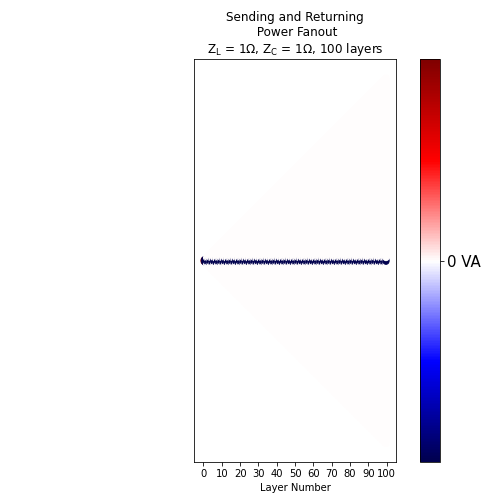

In [77]:
%matplotlib widget
plt.rcParams["figure.figsize"] = (7, 7)

max_layer_small = 100
x_tick_scalling = 10

za_str = "10"
zb_str = "1"

is_power = True
is_Current =  True

is_saving = False

mark_Nodes = False
plot_gird = True
plot_time_delays = False
plot_lables = False

file_name = "plots/"

layer_distance = 1
A_str = '7'
B_str = '5'
vs_str = '1'
za_decimal = Decimal(za_str)
zb_decimal = Decimal(zb_str)
vs_val = float(vs_str)
vs_decimal = Decimal(vs_str)
is_val = float(vs_decimal/(za_decimal + zb_decimal))
ps_val = float(vs_decimal*vs_decimal/(za_decimal + zb_decimal))
i_scale = float((za_decimal + zb_decimal))


(N, 
 M_x, M_y, 
 m_x, m_y, 
 s_x, s_y,
 r_x, r_y,
 l_x,l_y,L) =calcualte_numbers_and_grids_and_lines(A_str,B_str,max_layer_small,4,1/3,2/3)

# invert to make capacitor at top
s_y = [-1*i for i in s_y]
r_y = [-1*i for i in r_y]
M_y = [-1*i for i in M_y]

v_s,v_r,i_s,i_r,p_s,p_r = calculate_wavefronts(za_str,zb_str,vs_str,max_layer_small)

fig_current, ax_current = plt.subplots( subplot_kw = {'aspect':1})

# Plot Grid points
if(mark_Nodes):
    ax_current.scatter(M_x,M_y, s=50, c= 'black', marker = 'x')


if(is_power):
    sending_max = abs(np.max(p_s))
    returning_max = abs(np.max(p_r))
    sending_min = abs(np.min(p_s))
    returning_min = abs(np.min(p_r))
    bar_val = max(sending_max,returning_max,sending_min,returning_min)
    
    cax = ax_current.scatter(s_x,s_y,c=p_s,cmap=cm.seismic, vmax=bar_val, vmin=-bar_val,zorder=2,marker='o')
    ax_current.scatter(r_x,r_y,c=p_r,cmap=cm.seismic, vmax=bar_val, vmin=-bar_val,zorder=2,marker='o')
    cbar = fig_current.colorbar(cax, ticks=[-ps_val, 0, ps_val])
    cbar.ax.set_yticklabels(['$\mathregular{-VA_o}$', '0 VA', '$\mathregular{VA_o}$'])
    ax_current.set_title('Sending and Returning\n Power Fanout\n$\mathregular{Z_L}$ = '
                         +za_str+'Ω,' + ' $\mathregular{Z_C}$ = ' + zb_str+'Ω, '+str(max_layer_small)
                         +' layers')
    file_name += 'Sending_Returning_Power_'+za_str+'_'+zb_str+'_'+str(max_layer_small)+'_layers'+'.png'
    
elif(is_Current):
    sending_max = abs(np.max(i_s))
    returning_max = abs(np.max(i_r))
    sending_min = abs(np.min(i_s))
    returning_min = abs(np.min(i_r))
    bar_val = max(sending_max,returning_max,sending_min,returning_min)
    
    cax = ax_current.scatter(s_x,s_y,c=i_s,cmap=cm.seismic, vmax=bar_val, vmin=-bar_val,zorder=2,marker='o')
    ax_current.scatter(r_x,r_y,c=i_r,cmap=cm.seismic, vmax=bar_val, vmin=-bar_val,zorder=2,marker='o')
    cbar = fig_current.colorbar(cax, ticks=[-is_val, 0, is_val])
    cbar.ax.set_yticklabels(['$\mathregular{-i_o}$', '0 A', '$\mathregular{i_o}$'])
    ax_current.set_title('Sending and Returning\n Current Fanout\n$\mathregular{Z_L}$ = '
                         +za_str+'Ω,' + ' $\mathregular{Z_C}$ = ' + zb_str+'Ω, '+str(max_layer_small)
                         +' layers')
    file_name += 'Sending_Returning_Current_'+za_str+'_'+zb_str+'_'+str(max_layer_small)+'_layers'+'.png'
else:
    sending_max = abs(np.max(v_s))
    returning_max = abs(np.max(v_r))
    sending_min = abs(np.min(v_s))
    returning_min = abs(np.min(v_r))
    bar_val = max(sending_max,returning_max,sending_min,returning_min)
    
    cax = ax_current.scatter(s_x,s_y,c=v_s,cmap=cm.seismic, vmax=bar_val, vmin=-bar_val,zorder=2,marker='o')
    ax_current.scatter(r_x,r_y,c=v_r,cmap=cm.seismic, vmax=vs_val, vmin=-vs_val,zorder=2,marker='o')
    cbar = fig_current.colorbar(cax, ticks=[-vs_val/2,-vs_val, 0, vs_val,vs_val/2])
    cbar.ax.set_yticklabels(['$\mathregular{-1/2v_0}$','$\mathregular{-v_0}$', '0 V', '$\mathregular{v_0}$','$\mathregular{1/2v_0}$'])
    ax_current.set_title('Sending and Returning\n Voltage Fanout\n$\mathregular{Z_L}$ = '
                         +za_str+'Ω,' + ' $\mathregular{Z_C}$ = ' + zb_str+'Ω, '+str(max_layer_small)
                         +' layers')
    file_name += 'Sending_Returning_Voltage_'+za_str+'_'+zb_str+'_'+str(max_layer_small)+'_layers'+'.png'

cbar.ax.tick_params(labelsize=15)

if(plot_gird):
    for x, y in zip(l_x,l_y):
        ax_current.plot(x,y,'k-',linewidth =.2,zorder=1)


ax_current.set_yticks([])
plt.xticks(np.arange(0, (max_layer_small+1)*4, 4*x_tick_scalling),np.arange(0, max_layer_small+1, 1*x_tick_scalling))
plt.xlabel("Layer Number")
# plt.grid(axis = 'x')

# plot text
shift = 0.5

if plot_time_delays:
    for i, txt in enumerate(N):
        ax_current.text(M_x[i]-shift, M_y[i]-shift,txt)

if plot_lables:
    for i, txt in enumerate(L):
        ax_current.text(M_x[i]+0.4, M_y[i]-0.25,txt,fontsize=12)
        
plt.tight_layout()
fig_current.patch.set_facecolor('white')

if is_saving:
    plt.savefig(file_name)

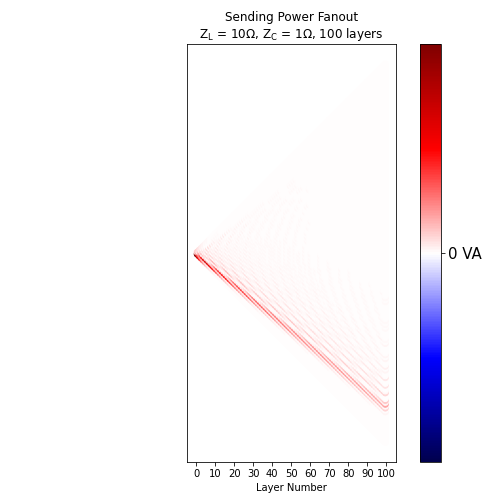

In [81]:
max_layer_small = 100
x_tick_scalling = 10

za_str = "10"
zb_str = "1"

is_power = True

is_Current = False
is_sending = True

is_saving = False

mark_Nodes = False
plot_gird = True
plot_time_delays = False
plot_lables = False

file_name = "plots/"

layer_distance = 1
A_str = '7'
B_str = '5'
za_decimal = Decimal(za_str)
zb_decimal = Decimal(zb_str)
vs_str = '1'
vs_val = float(vs_str)
vs_decimal = Decimal(vs_str)
is_val = float(vs_decimal/(za_decimal + zb_decimal))
ps_val = float(vs_decimal*vs_decimal/(za_decimal + zb_decimal))
i_scale = float((za_decimal + zb_decimal))


(N, 
 M_x, M_y, 
 m_x, m_y, 
 s_x, s_y,
 r_x, r_y,
 l_x,l_y,L) =calcualte_numbers_and_grids_and_lines(A_str,B_str,max_layer_small,4,1/3,2/3)

# invert to make capacitor at top
s_y = [-1*i for i in s_y]
r_y = [-1*i for i in r_y]
m_y = [-1*i for i in m_y]
M_y = [-1*i for i in M_y]

v_s,v_r,i_s,i_r,p_s,p_r = calculate_wavefronts(za_str,zb_str,vs_str,max_layer_small)

fig_current, ax_current = plt.subplots( subplot_kw = {'aspect':1})

# Plot Grid points
if(mark_Nodes):
    ax_current.scatter(M_x,M_y, s=50, c= 'black', marker = 'x')

title_str = ""
to_plot = []

if(is_sending):
    title_str += "Sending "
    file_name += "Sending_"

    if(is_power):
        title_str += "Power "
        file_name += "Power_"
        to_plot = p_s
    elif(is_Current):
        title_str += "Current "
        file_name += "Current_"
        to_plot = i_s
    else:
        title_str += "Voltage "
        file_name += "Voltage_"
        to_plot = v_s

else: 
    title_str += "Returning "
    file_name += "Returning_"
    if(is_power):
        title_str += "Power "
        file_name += "Power_"
        to_plot = p_r
    elif(is_Current):
        to_plot = i_r
        title_str += "Current "
        file_name += "Current_"
    else:
        title_str += "Voltage "
        file_name += "Voltage_"
        to_plot = v_r

title_str += ('Fanout\n$\mathregular{Z_L}$ = '+za_str+'Ω,' + ' $\mathregular{Z_C}$ = ' + zb_str+'Ω, '+str(max_layer_small)+' layers')
ax_current.set_title(title_str)

file_name += f'{za_str}_{zb_str}_{max_layer_small}_layers.png'

bar_val_max = abs(np.max(to_plot))
bar_val_min = abs(np.min(to_plot))
bar_val = max(bar_val_max,bar_val_min)

cax = ax_current.scatter(m_x,m_y,c=to_plot,cmap=cm.seismic, vmax=bar_val, vmin=-bar_val,zorder=2,marker='o')

if (is_power):
    cbar = fig_current.colorbar(cax, ticks=[-2*ps_val,-ps_val, 0, ps_val,2*ps_val])
    cbar.ax.set_yticklabels(['$\mathregular{-2p_o}$','$\mathregular{-p_o}$', '0 VA', '$\mathregular{p_o}$','$\mathregular{2p_o}$'])
elif(is_Current):
    cbar = fig_current.colorbar(cax, ticks=[-2*is_val,-is_val, 0, is_val,2*is_val])
    cbar.ax.set_yticklabels(['$\mathregular{-2i_o}$','$\mathregular{-i_o}$', '0 A', '$\mathregular{i_o}$','$\mathregular{2i_o}$'])
else:
    cbar = fig_current.colorbar(cax, ticks=[-vs_val/2,-vs_val, 0, vs_val,vs_val/2])
    cbar.ax.set_yticklabels(['$\mathregular{-1/2v_0}$','$\mathregular{-v_0}$', '0 V', '$\mathregular{v_0}$','$\mathregular{1/2v_0}$'])

cbar.ax.tick_params(labelsize=15)

if(plot_gird):
    for x, y in zip(l_x,l_y):
        ax_current.plot(x,y,'k-',linewidth =.2,zorder=1)


ax_current.set_yticks([])
plt.xticks(np.arange(0, (max_layer_small+1)*4, 4*x_tick_scalling),np.arange(0, max_layer_small+1, 1*x_tick_scalling))
plt.xlabel("Layer Number")
# plt.grid(axis = 'x')

# plot text
shift = 0.5

if plot_time_delays:
    for i, txt in enumerate(N):
        ax_current.text(M_x[i]-shift, M_y[i]-shift,txt)

if plot_lables:
    for i, txt in enumerate(L):
        ax_current.text(M_x[i]+0.4, M_y[i]-0.25,txt,fontsize=12)

plt.tight_layout()
fig_current.patch.set_facecolor('white')

if is_saving:
    plt.savefig(file_name)

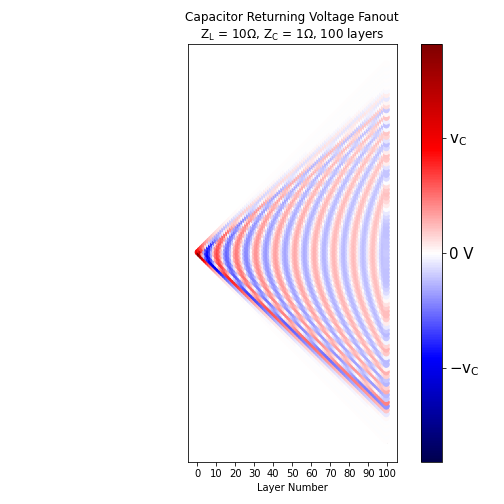

In [85]:
fig_current, ax_current = plt.subplots( subplot_kw = {'aspect':1})

max_layer_small = 100
x_tick_scalling = 10

za_str = "10"
zb_str = "1"

is_power = False

is_Current = False
is_capacitor = True
is_sending = False

is_saving = False

is_major = False
mark_Nodes = False
plot_gird = True
plot_time_delays = False
plot_lables = False

file_name = "plots/"

layer_distance = 1
A_str = '1'
B_str = '1'
vs_str = '1'
za_decimal = Decimal(za_str)
zb_decimal = Decimal(zb_str)
vs_val = float(vs_str)
vs_decimal = Decimal(vs_str)
is_val = float(vs_decimal/(za_decimal + zb_decimal))
ps_val = float(vs_decimal*vs_decimal/(za_decimal + zb_decimal))
i_scale = float((za_decimal + zb_decimal))

vs_a = vs_decimal/(za_decimal + zb_decimal)*za_decimal
vs_b = vs_decimal/(za_decimal + zb_decimal)*zb_decimal


(N, 
 M_x, M_y, 
 m_x, m_y, 
 s_x, s_y,
 r_x, r_y,
 l_x,l_y,L) =calcualte_numbers_and_grids_and_lines(A_str,B_str,max_layer_small,4,1/3,2/3)

# invert to make capacitor at top
s_y = [-1*i for i in s_y]
r_y = [-1*i for i in r_y]
m_y = [-1*i for i in m_y]
M_y = [-1*i for i in M_y]

v_s,v_r,i_s,i_r,p_s,p_r = calculate_wavefronts(za_str,zb_str,vs_str,max_layer_small)

ind_i_s = i_s[::2]
ind_v_s = v_s[::2]
ind_p_s = p_s[::2]
ind_i_r = i_r[::2]
ind_v_r = v_r[::2]
ind_p_r = p_r[::2]
ind_m_x = m_x[::2]
ind_m_y = m_y[::2]

cap_i_s =i_s[1::2]
cap_v_s =v_s[1::2]
cap_p_s =p_s[1::2]
cap_i_r =i_r[1::2]
cap_v_r =v_r[1::2]
cap_p_r =p_r[1::2]
cap_m_x =m_x[1::2]
cap_m_y =m_y[1::2]


# Plot Grid points
if(mark_Nodes):
    ax_current.scatter(M_x,M_y, s=50, c= 'black', marker = 'x')

title_str = ""
to_plot = []
x =[]
y =[]


if(is_capacitor):
    title_str += "Capacitor "
    file_name += "Capacitor_"
    x = cap_m_x
    y = cap_m_y

    if(is_sending):
        title_str += "Sending "
        file_name += "Sending_"
        
        if(is_power):
            title_str += "Power "
            file_name += "Power_"
            to_plot = cap_p_s
        elif(is_Current):
            title_str += "Current "
            file_name += "Current_"
            to_plot = cap_i_s
        else:
            title_str += "Voltage "
            file_name += "Voltage_"
            to_plot = cap_v_s

    else: 
        title_str += "Returning "
        file_name += "Returning_"
        
        if(is_power):
            to_plot = cap_p_r
            title_str += "Power "
            file_name += "Power_"
        elif(is_Current):
            to_plot = cap_i_r
            title_str += "Current "
            file_name += "Current_"
        else:
            title_str += "Voltage "
            file_name += "Voltage_"
            to_plot = cap_v_r
else:
    title_str += "Inductor "
    file_name += "Inductor_"
    x = ind_m_x
    y = ind_m_y

    if(is_sending):
        title_str += "Sending "
        file_name += "Sending_"
        
        if(is_power):
            title_str += "Power "
            file_name += "Power_"
            to_plot = ind_p_s
        elif(is_Current):
            title_str += "Current "
            file_name += "Current_"
            to_plot = ind_i_s
        else:
            title_str += "Voltage "
            file_name += "Voltage_"
            to_plot = ind_v_s
    else: 
        title_str += "Returning "
        file_name += "Returning_"
        if(is_power):
            title_str += "Power "
            file_name += "Power_"
            to_plot = ind_p_r
        elif(is_Current):
            title_str += "Current "
            file_name += "Current_"
            to_plot = ind_i_r
        else:
            title_str += "Voltage "
            file_name += "Voltage_"
            to_plot = ind_v_r

title_str += ('Fanout\n$\mathregular{Z_L}$ = '+za_str+'Ω,' + ' $\mathregular{Z_C}$ = ' + zb_str+'Ω, '+str(max_layer_small)+' layers')
file_name += (za_str + '_' + zb_str + '_' +str(max_layer_small)+'_layers'+'.png')

ax_current.set_title(title_str)


if is_major:
    x = M_x[:-max_layer_small-1]
    y = M_y[:-max_layer_small-1]



bar_val_max = abs(np.max(to_plot))
bar_val_min = abs(np.min(to_plot))
bar_val = max(bar_val_max,bar_val_min)


if(is_power):
    cax = ax_current.scatter(x,y,c=to_plot,cmap=cm.seismic,vmax=bar_val,vmin=-bar_val,zorder=2,marker='o')
    cbar = fig_current.colorbar(cax, ticks=[-2*ps_val,-ps_val, 0, ps_val,2*ps_val])
    cbar.ax.set_yticklabels(['$\mathregular{-2p_o}$','$\mathregular{-p_o}$', '0 VA', '$\mathregular{p_o}$','$\mathregular{2p_o}$'])
elif(is_Current):
    cax = ax_current.scatter(x,y,c=to_plot,cmap=cm.seismic,vmax=bar_val,vmin=-bar_val,zorder=2,marker='o')
    cbar = fig_current.colorbar(cax, ticks=[-2*is_val,-is_val, 0, is_val,2*is_val])
    cbar.ax.set_yticklabels(['$\mathregular{-2i_o}$','$\mathregular{-i_o}$', '0 A', '$\mathregular{i_o}$','$\mathregular{2i_o}$'])
else:
    if is_capacitor:
        vs_val = vs_b
        value_str = "C"
    else:
        vs_val = vs_a
        value_str = "L"

    cax = ax_current.scatter(x,y,c=to_plot,cmap=cm.seismic, vmax=bar_val, vmin=-bar_val,zorder=2,marker='o')
    cbar = fig_current.colorbar(cax, ticks=[-2*vs_val,-vs_val, 0, vs_val,2*vs_val])
    cbar.ax.set_yticklabels(['$\mathregular{-2v_'+value_str+'}$','$\mathregular{-v_'+value_str+'}$', '0 V', '$\mathregular{v_'+value_str+'}$','$\mathregular{2v_'+value_str+'}$'])


cbar.ax.tick_params(labelsize=15)

if(plot_gird):
    for x, y in zip(l_x,l_y):
        ax_current.plot(x,y,'k-',linewidth =.2,zorder=1)


ax_current.set_yticks([])
plt.xticks(np.arange(0, (max_layer_small+1)*4, 4*x_tick_scalling),np.arange(0, max_layer_small+1, 1*x_tick_scalling))
plt.xlabel("Layer Number")
# plt.grid(axis = 'x')

# plot text
shift = 0.5

if plot_time_delays:
    for i, txt in enumerate(N):
        ax_current.text(M_x[i]-shift, M_y[i]-shift,txt)

if plot_lables:
    for i, txt in enumerate(L):
        ax_current.text(M_x[i]+0.4, M_y[i]-0.25,txt,fontsize=12)

plt.tight_layout()
fig_current.patch.set_facecolor('white')

if is_saving:
    plt.savefig(file_name)

In [9]:
your_list = [0,1,2,3,4,5,6,7,8,9]
your_list[:-3]

[0, 1, 2, 3, 4, 5, 6]